# Socioeconomic Extension Project

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#1a55FF', '#55a8ff', '#6df7fd', '#f2ad92', '#d96459',
        '#f2a541', '#f2d83d', '#b2d732', '#33d9b2', '#127475',
        '#004777'
    ]


grouped_df_dept = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/Extension/grouped_df_dept.csv")
grouped_df_dept = grouped_df_dept.rename(columns={'Total_Project_Budget': 'Total_Dept_Project_Budget'})
grouped_df_dept

,Neighborhood,PM_Department,Total_Dept_Project_Budget
0,Allston/Brighton,Parks and Recreation Department,1.246667e+06
1,Allston/Brighton,Public Facilities Department,5.854167e+06
2,Allston/Brighton,Public Works Department,5.000000e+06
3,Back Bay,Boston Public Library,4.000000e+05
4,Back Bay,Boston Transportation Department,9.876299e+06
...,...,...,...
82,West End,Public Facilities Department,3.000000e+06
83,West End,Public Works Department,2.000000e+06
84,West Roxbury,Boston Transportation Department,4.000000e+05
85,West Roxbury,Parks and Recreation Department,4.737500e+06


## Distribution of Total Project Budget By Neighborhood

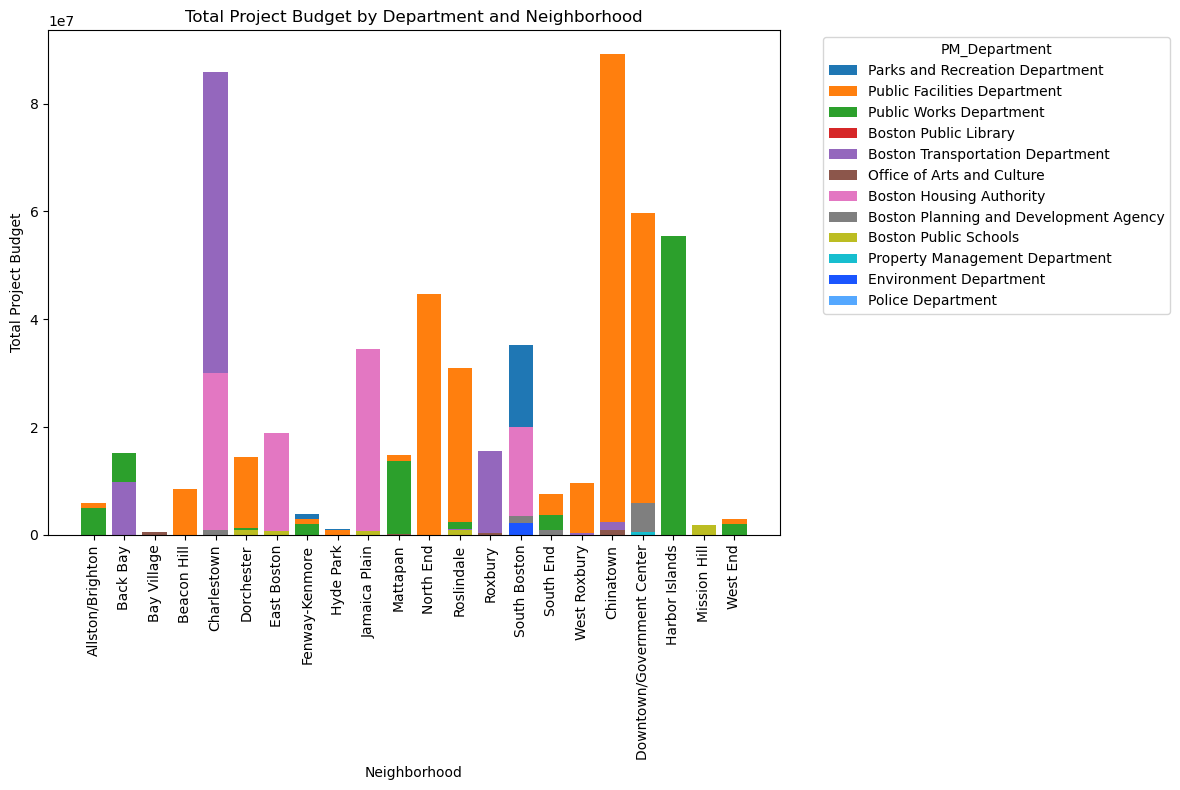

In [15]:
plt.figure(figsize=(12, 8))
for i, department in enumerate(grouped_df_dept['PM_Department'].unique()):
    dept_data = grouped_df_dept[grouped_df_dept['PM_Department'] == department]
    plt.bar(dept_data['Neighborhood'], dept_data['Total_Dept_Project_Budget'], color=colors[i % len(colors)], label=department)

plt.xlabel('Neighborhood')
plt.ylabel('Total Project Budget')
plt.title('Total Project Budget by Department and Neighborhood')
plt.legend(title='PM_Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Here one can observe that some of the departments with most budget per neighborhood across all neighborhoods on the capital plan are the Public Facilities Department, Public Works Department, and the Boston Housing Authority. This might be because the plan includes several improvements to traffic infraestructure, government-owned buildings, and new housing projects. 

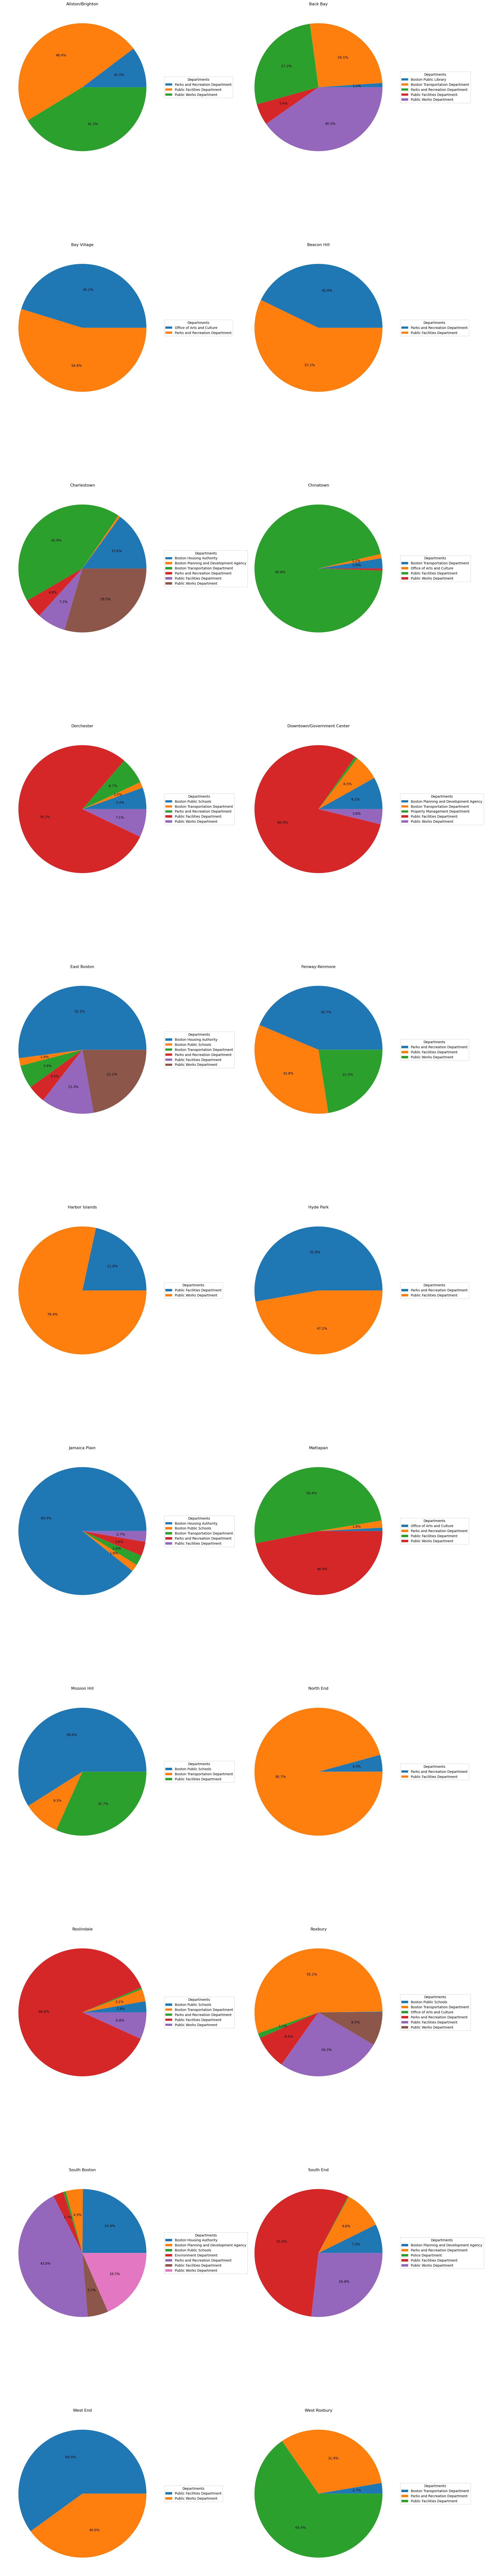

In [26]:
neighborhoods = grouped_df_dept['Neighborhood'].unique()
n_rows = int(np.ceil(len(neighborhoods) / 2))


fig, axs = plt.subplots(n_rows, 2, figsize=(20, n_rows*10))
axs = axs.flatten()

for ax, neighborhood in zip(axs, neighborhoods):
    neighborhood_data = grouped_df_dept[grouped_df_dept['Neighborhood'] == neighborhood]
    percentage = neighborhood_data['Total_Dept_Project_Budget'] / neighborhood_data['Total_Dept_Project_Budget'].sum() * 100

    def custom_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 0.9 else None
    
    wedges, texts, autotexts = ax.pie(percentage, autopct=custom_autopct)
    ax.set_title(neighborhood)
    ax.legend(wedges, neighborhood_data['PM_Department'], title="Departments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for i in range(len(neighborhoods), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

Above, there is a more detailed distribution of the total budget by department for each neighborhood, for all neighborhoods. (This would be a good thing to have in an appendix for the report).

## Place of Work in relation to Total Project Budget Data

In [30]:
grouped_df_work = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/2015-2019_neighborhood_tables_2021.12.21-Place_of_Work.csv",skiprows=2)
grouped_df_work

,Place of Work,Total Workers,Worked in state of residence,Unnamed: 3,Worked in county of residence,Unnamed: 5
0,NaN,NaN,Worked in state of residence,% of Total,Worked in county of residence,% of State
1,United States,"152,735,781","147,073,507",96.3%,"110,334,054",75.0%
2,Massachusetts,"3,545,037","3,406,602",96.1%,"2,313,581",67.9%
3,Boston,"374,671","370,091",98.8%,"265,458",71.7%
4,Allston,"10,479","10,317",98.5%,"6,765",65.6%
5,Back Bay,"10,996","10,649",96.8%,"7,834",73.6%
6,Beacon Hill,"6,797","6,608",97.2%,"5,049",76.4%
7,Brighton,"35,529","35,180",99.0%,"20,068",57.0%
8,Charlestown,"11,776","11,509",97.7%,"7,729",67.2%
9,Dorchester,"63,303","62,730",99.1%,"46,852",74.7%


In [31]:
grouped_df_work.columns = [grouped_df_work[col][0] if 'Unnamed' in col else col for col in grouped_df_work.columns]
grouped_df_work.columns

Index(['Place of Work', 'Total Workers', 'Worked in state of residence',
       '% of Total', 'Worked in county of residence', '% of State'],
      dtype='object')

In [32]:
grouped_df_work = grouped_df_work.drop(grouped_df_work.index[:4])
grouped_df_work = grouped_df_work.dropna(axis=0)
grouped_df_work = grouped_df_work.reset_index(drop=True)
grouped_df_work = grouped_df_work.rename(columns={'Place of Work': 'Neighborhood'})
grouped_df_work['Total Workers'] = grouped_df_work['Total Workers'].str.replace(',', '').astype(int)

grouped_df_work

,Neighborhood,Total Workers,Worked in state of residence,% of Total,Worked in county of residence,% of State
0,Allston,10479,"10,317",98.5%,"6,765",65.6%
1,Back Bay,10996,"10,649",96.8%,"7,834",73.6%
2,Beacon Hill,6797,"6,608",97.2%,"5,049",76.4%
3,Brighton,35529,"35,180",99.0%,"20,068",57.0%
4,Charlestown,11776,"11,509",97.7%,"7,729",67.2%
5,Dorchester,63303,"62,730",99.1%,"46,852",74.7%
6,Downtown,9392,"9,136",97.3%,"7,288",79.8%
7,East Boston,27230,"27,072",99.4%,"20,808",76.9%
8,Fenway,16570,"16,182",97.7%,"12,239",75.6%
9,Hyde Park,19766,"19,531",98.8%,"13,002",66.6%


In [33]:
grouped_budgets = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/grouped_budgets.csv")
grouped_budgets

,Neighborhood,Total_Project_Budget,sqMiles,Budget_per_sqm,Budget_per_pop
0,Bay Village,1525000.0,0.04,3.812500e+07,228.054434
1,West End,5000000.0,0.30,1.666667e+07,629.564341
2,Mission Hill,5242212.0,0.55,9.531295e+06,456.559136
3,Hyde Park,6615000.0,4.57,1.447484e+06,393.305191
4,Fenway-Kenmore,12750000.0,0.88,1.448864e+07,1297.181809
5,Beacon Hill,34410000.0,0.31,1.110000e+08,2617.327147
6,West Roxbury,48645000.0,5.49,8.860656e+06,5309.430255
7,Allston/Brighton,57605000.0,4.44,1.297410e+07,43906.250000
8,East Boston,62457890.0,4.71,1.326070e+07,3770.473287
9,Back Bay,65442299.0,0.62,1.055521e+08,18393.001405


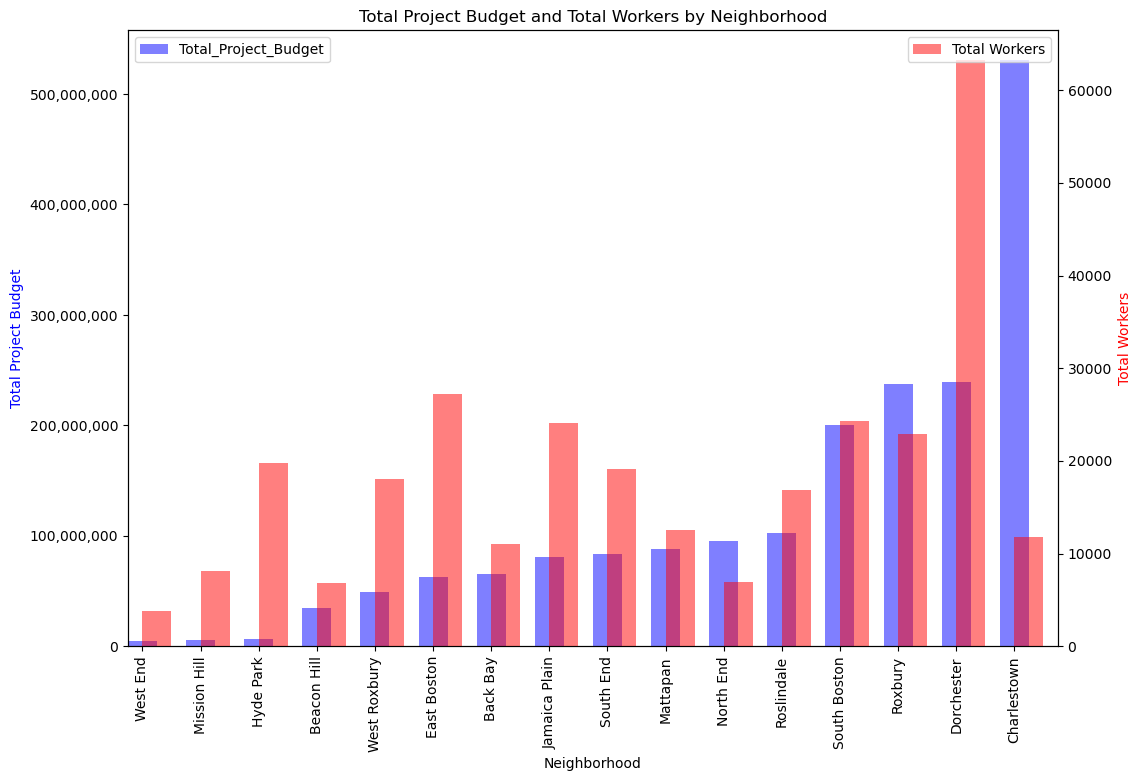

In [34]:
import matplotlib.ticker as ticker


fig, ax1 = plt.subplots(figsize=(12, 8))

merged_df_bw = pd.merge(grouped_budgets, grouped_df_work, on='Neighborhood')
merged_df_bw.plot(kind='bar', x='Neighborhood', y='Total_Project_Budget', ax=ax1, color='b', alpha=0.5)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = ax1.twinx()
merged_df_bw.plot(kind='bar', x='Neighborhood', y='Total Workers', ax=ax2, color='r', alpha=0.5, position=0)


ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Total Project Budget', color='b')
ax2.set_ylabel('Total Workers', color='r')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title('Total Project Budget and Total Workers by Neighborhood')


plt.show()

Neighborhoods with higher total project budget tend to have a high number of workers, except for Charlestown and Mission Hill. Some neighborhoods such as Charlestown, North End, and Roxbury have high total project budgets per worker, indicating a substantial investment in each worker. On the other hand, Mission Hill and Hyde Park, have a low total project budget per worker.

In [35]:
merged_df_bw

,Neighborhood,Total_Project_Budget,sqMiles,Budget_per_sqm,Budget_per_pop,Total Workers,Worked in state of residence,% of Total,Worked in county of residence,% of State
0,West End,5000000.0,0.30,1.666667e+07,629.564341,3838,"3,752",97.8%,"2,666",71.1%
1,Mission Hill,5242212.0,0.55,9.531295e+06,456.559136,8145,"8,063",99.0%,"6,333",78.5%
2,Hyde Park,6615000.0,4.57,1.447484e+06,393.305191,19766,"19,531",98.8%,"13,002",66.6%
3,Beacon Hill,34410000.0,0.31,1.110000e+08,2617.327147,6797,"6,608",97.2%,"5,049",76.4%
4,West Roxbury,48645000.0,5.49,8.860656e+06,5309.430255,18090,"17,941",99.2%,"11,032",61.5%
5,East Boston,62457890.0,4.71,1.326070e+07,3770.473287,27230,"27,072",99.4%,"20,808",76.9%
6,Back Bay,65442299.0,0.62,1.055521e+08,18393.001405,10996,"10,649",96.8%,"7,834",73.6%
7,Jamaica Plain,80782500.0,3.94,2.050317e+07,8806.551837,24058,"23,837",99.1%,"17,655",74.1%
8,South End,83548002.0,0.74,1.129027e+08,15301.831868,19072,"18,649",97.8%,"14,231",76.3%
9,Mattapan,87935000.0,2.11,4.167536e+07,17289.618561,12562,"12,522",99.7%,"9,306",74.3%


### Distribution of budget on the neighborhoods with the most, median, and least number of workers

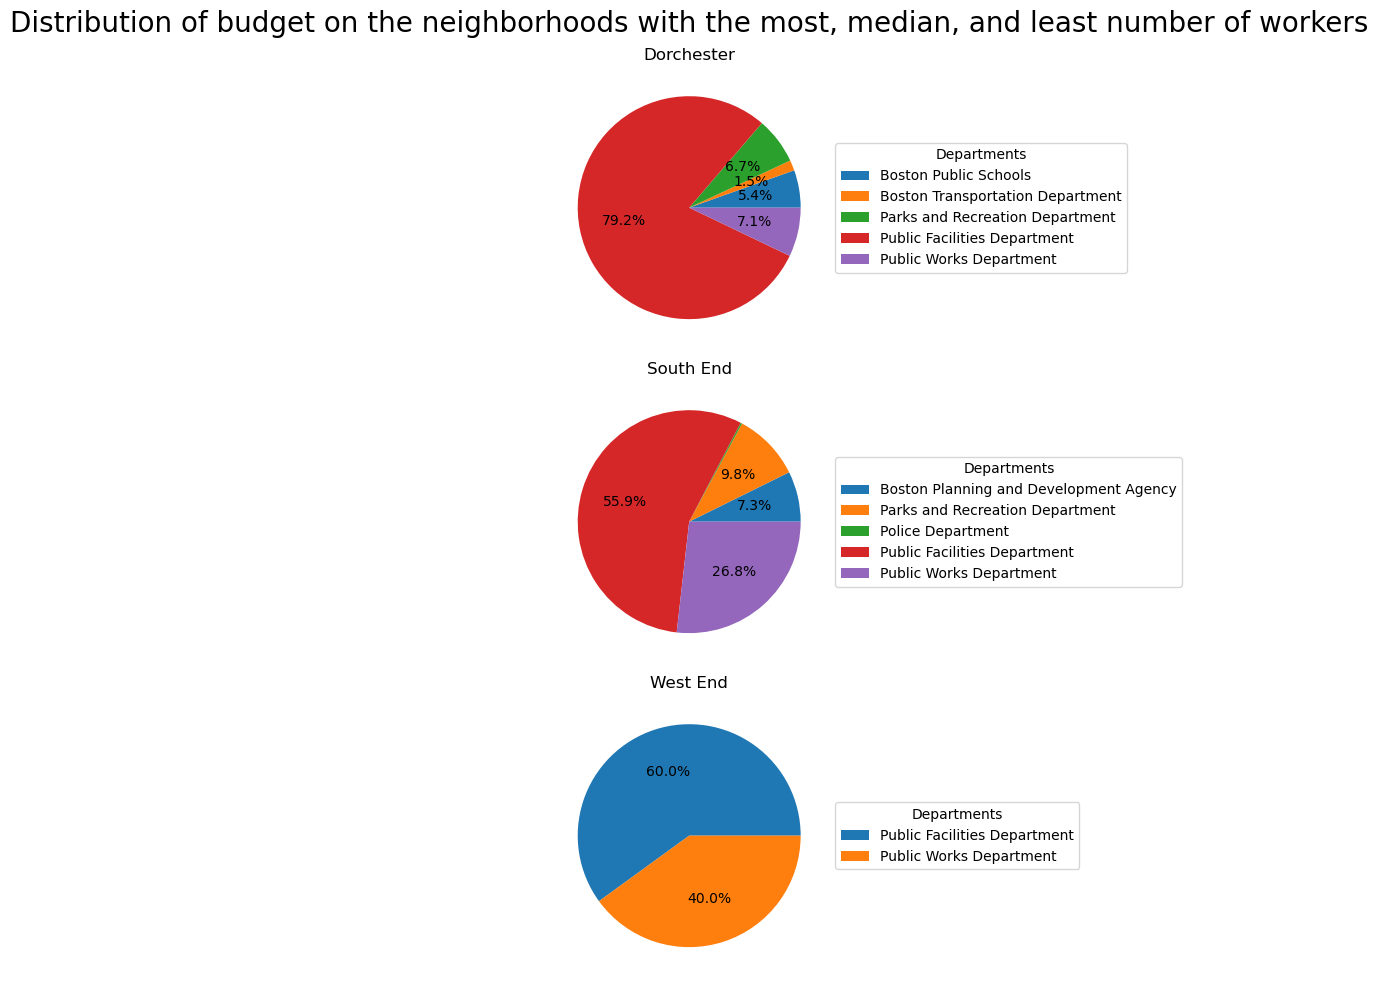

In [36]:
merged_df = pd.merge(grouped_df_dept, grouped_df_work, on='Neighborhood')
# Get the neighborhoods with the most, median, and least number of workers
most_workers_neighborhood = merged_df.loc[merged_df['Total Workers'].idxmax(), 'Neighborhood']
least_workers_neighborhood = merged_df.loc[merged_df['Total Workers'].idxmin(), 'Neighborhood']
median_workers = merged_df['Total Workers'].median()
median_workers_neighborhood = merged_df.loc[(merged_df['Total Workers'] - median_workers).abs().idxmin(), 'Neighborhood']

selected_neighborhoods = [most_workers_neighborhood, median_workers_neighborhood, least_workers_neighborhood]

# print(selected_neighborhoods)
fig, axs = plt.subplots(3, 1, figsize=(20, 10))  # Adjust the subplot layout to 1 row and 3 columns
fig.suptitle('Distribution of budget on the neighborhoods with the most, median, and least number of workers', fontsize=20)
axs = axs.flatten()

for ax, neighborhood in zip(axs, selected_neighborhoods):
    neighborhood_data = grouped_df_dept[grouped_df_dept['Neighborhood'] == neighborhood]
    # print(neighborhood_data)
    percentage = neighborhood_data['Total_Dept_Project_Budget'] / neighborhood_data['Total_Dept_Project_Budget'].sum() * 100

    def custom_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 0.9 else None
    
    wedges, texts, autotexts = ax.pie(percentage, autopct=custom_autopct)
    ax.set_title(neighborhood)
    ax.legend(wedges, neighborhood_data['PM_Department'], title="Departments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

## Education Enrollment in relation to Total Project Budget Data

In [38]:
grouped_df_ed = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/2015-2019_neighborhood_tables_2021.12.21-School-Enrollment.csv",skiprows=1)
grouped_df_ed = grouped_df_ed.drop(grouped_df_ed.index[26:31])
grouped_df_ed

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,Population Age 3+,Enrolled in school:,%,"Enrolled in nursery school, preschool",% of Enrolled,Enrolled in kindergarten,% of Enrolled,Enrolled in grade 1 to grade 4,% of Enrolled,Enrolled in grade 5 to grade 8,% of Enrolled,Enrolled in kindergarten to grade 8,% of Enrolled,Enrolled in grade 9 to grade 12,% of Enrolled,"Enrolled in college, undergraduate years",% of Enrolled,Graduate or professional school,% of Enrolled
1,United States,"313,082,053","81,084,866",25.9%,"4,976,762",6.1%,"4,048,970",5.0%,"16,144,177",19.9%,"16,594,786",20.5%,"36,787,933",45.4%,"16,991,221",21.0%,"18,099,606",22.3%,"4,229,344",5.2%
2,Massachusetts,"6,639,339","1,723,161",26.0%,"109,322",6.3%,"75,690",4.4%,"295,248",17.1%,"314,060",18.2%,"684,998",39.8%,"341,750",19.8%,"445,163",25.8%,"141,928",8.2%
3,Boston,"663,443","192,091",29.0%,"7,508",3.9%,"8,480",4.4%,"23,325",12.1%,"22,736",11.8%,"54,541",28.4%,"24,433",12.7%,"74,170",38.6%,"31,439",16.4%
4,Allston,"19,168","10,673",55.7%,16,0.1%,25,0.2%,247,2.3%,170,1.6%,442,4.1%,144,1.3%,"6,320",59.2%,"3,751",35.1%
5,Back Bay,"17,475","4,312",24.7%,98,2.3%,39,0.9%,216,5.0%,245,5.7%,500,11.6%,202,4.7%,"2,302",53.4%,"1,210",28.1%
6,Beacon Hill,"9,322","1,150",12.3%,111,9.7%,58,5.0%,198,17.2%,81,7.0%,337,29.3%,99,8.6%,203,17.7%,400,34.8%
7,Brighton,"54,036","15,553",28.8%,235,1.5%,327,2.1%,"1,150",7.4%,965,6.2%,"2,442",15.7%,980,6.3%,"6,133",39.4%,"5,763",37.1%
8,Charlestown,"18,711","3,344",17.9%,503,15.0%,346,10.3%,726,21.7%,549,16.4%,"1,621",48.5%,387,11.6%,312,9.3%,521,15.6%
9,Dorchester,"122,192","32,935",27.0%,"1,337",4.1%,"2,283",6.9%,"6,088",18.5%,"6,291",19.1%,"14,662",44.5%,"6,897",20.9%,"7,814",23.7%,"2,225",6.8%


In [39]:
grouped_df_ed.columns = [grouped_df_ed[col][0] if 'Unnamed' in col else col for col in grouped_df_ed.columns]
grouped_df_ed.columns

Index([                                       nan,
                              'Population Age 3+',
                            'Enrolled in school:',
                                             '% ',
          'Enrolled in nursery school, preschool',
                                  '% of Enrolled',
                       'Enrolled in kindergarten',
                                  '% of Enrolled',
                 'Enrolled in grade 1 to grade 4',
                                  '% of Enrolled',
                 'Enrolled in grade 5 to grade 8',
                                  '% of Enrolled',
            'Enrolled in kindergarten to grade 8',
                                  '% of Enrolled',
                'Enrolled in grade 9 to grade 12',
                                  '% of Enrolled',
       'Enrolled in college, undergraduate years',
                                  '% of Enrolled',
                'Graduate or professional school',
                               

In [40]:
grouped_df_ed = grouped_df_ed.rename(columns={grouped_df_ed.columns[0]: 'Neighborhood'})
grouped_df_ed = grouped_df_ed.drop(grouped_df_ed.index[0:4])
grouped_df_ed

,Neighborhood,Population Age 3+,Enrolled in school:,%,"Enrolled in nursery school, preschool",% of Enrolled,Enrolled in kindergarten,% of Enrolled,Enrolled in grade 1 to grade 4,% of Enrolled,Enrolled in grade 5 to grade 8,% of Enrolled,Enrolled in kindergarten to grade 8,% of Enrolled,Enrolled in grade 9 to grade 12,% of Enrolled,"Enrolled in college, undergraduate years",% of Enrolled,Graduate or professional school,% of Enrolled
4,Allston,"19,168","10,673",55.7%,16,0.1%,25,0.2%,247,2.3%,170,1.6%,442,4.1%,144,1.3%,"6,320",59.2%,"3,751",35.1%
5,Back Bay,"17,475","4,312",24.7%,98,2.3%,39,0.9%,216,5.0%,245,5.7%,500,11.6%,202,4.7%,"2,302",53.4%,"1,210",28.1%
6,Beacon Hill,"9,322","1,150",12.3%,111,9.7%,58,5.0%,198,17.2%,81,7.0%,337,29.3%,99,8.6%,203,17.7%,400,34.8%
7,Brighton,"54,036","15,553",28.8%,235,1.5%,327,2.1%,"1,150",7.4%,965,6.2%,"2,442",15.7%,980,6.3%,"6,133",39.4%,"5,763",37.1%
8,Charlestown,"18,711","3,344",17.9%,503,15.0%,346,10.3%,726,21.7%,549,16.4%,"1,621",48.5%,387,11.6%,312,9.3%,521,15.6%
9,Dorchester,"122,192","32,935",27.0%,"1,337",4.1%,"2,283",6.9%,"6,088",18.5%,"6,291",19.1%,"14,662",44.5%,"6,897",20.9%,"7,814",23.7%,"2,225",6.8%
10,Downtown,"17,847","5,745",32.2%,150,2.6%,146,2.5%,309,5.4%,237,4.1%,692,12.0%,106,1.8%,"3,663",63.8%,"1,134",19.7%
11,East Boston,"45,775","10,676",23.3%,763,7.1%,627,5.9%,"2,173",20.4%,"2,122",19.9%,"4,922",46.1%,"1,713",16.0%,"2,081",19.5%,"1,197",11.2%
12,Fenway,"33,378","21,706",65.0%,21,0.1%,0,0.0%,151,0.7%,110,0.5%,261,1.2%,218,1.0%,"17,773",81.9%,"3,433",15.8%
13,Hyde Park,"37,832","11,218",29.7%,460,4.1%,889,7.9%,"1,829",16.3%,"2,135",19.0%,"4,853",43.3%,"2,243",20.0%,"2,769",24.7%,893,8.0%


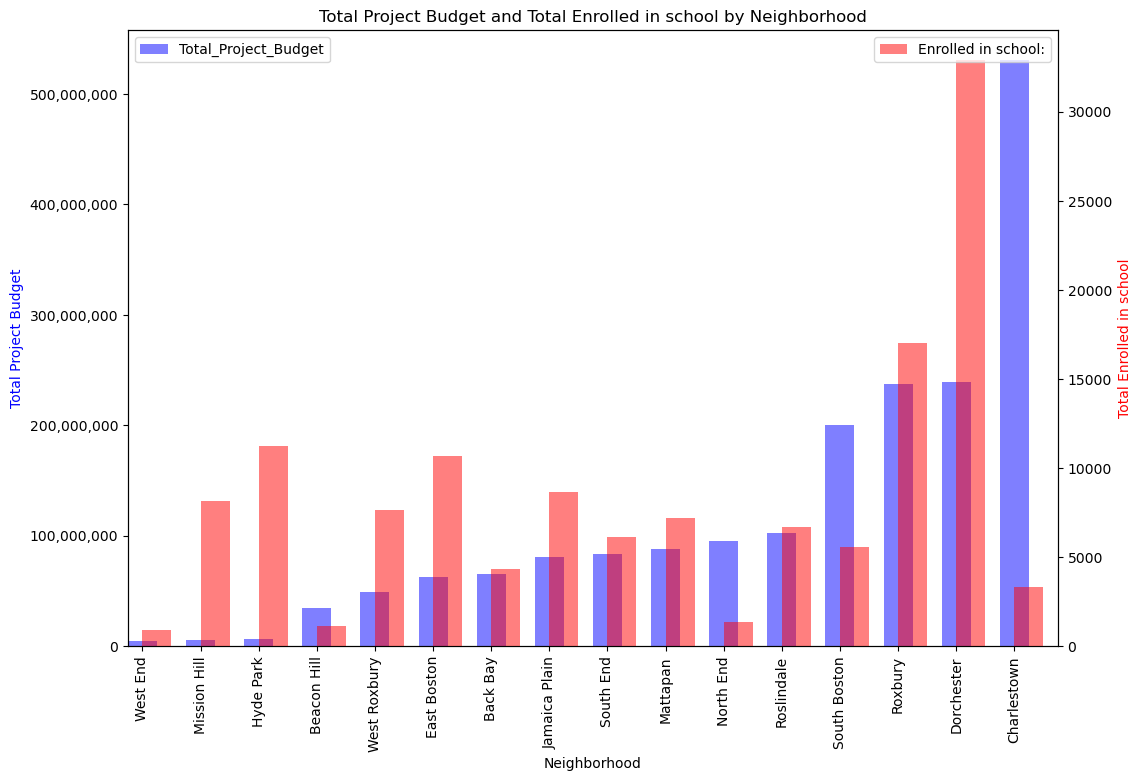

In [41]:
import matplotlib.ticker as ticker


grouped_df_ed['Enrolled in school:'] = grouped_df_ed['Enrolled in school:'].str.replace(',', '').astype(int)

fig, ax1 = plt.subplots(figsize=(12, 8))

merged_df_be = pd.merge(grouped_budgets, grouped_df_ed, on='Neighborhood')
merged_df_be.plot(kind='bar', x='Neighborhood', y='Total_Project_Budget', ax=ax1, color='b', alpha=0.5)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = ax1.twinx()
merged_df_be.plot(kind='bar', x='Neighborhood', y='Enrolled in school:', ax=ax2, color='r', alpha=0.5, position=0)


ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Total Project Budget', color='b')
ax2.set_ylabel('Total Enrolled in school', color='r')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title('Total Project Budget and Total Enrolled in school by Neighborhood')


plt.show()

### Distribution of budget on the neighborhoods with the most, median, and least number of enrolled in School

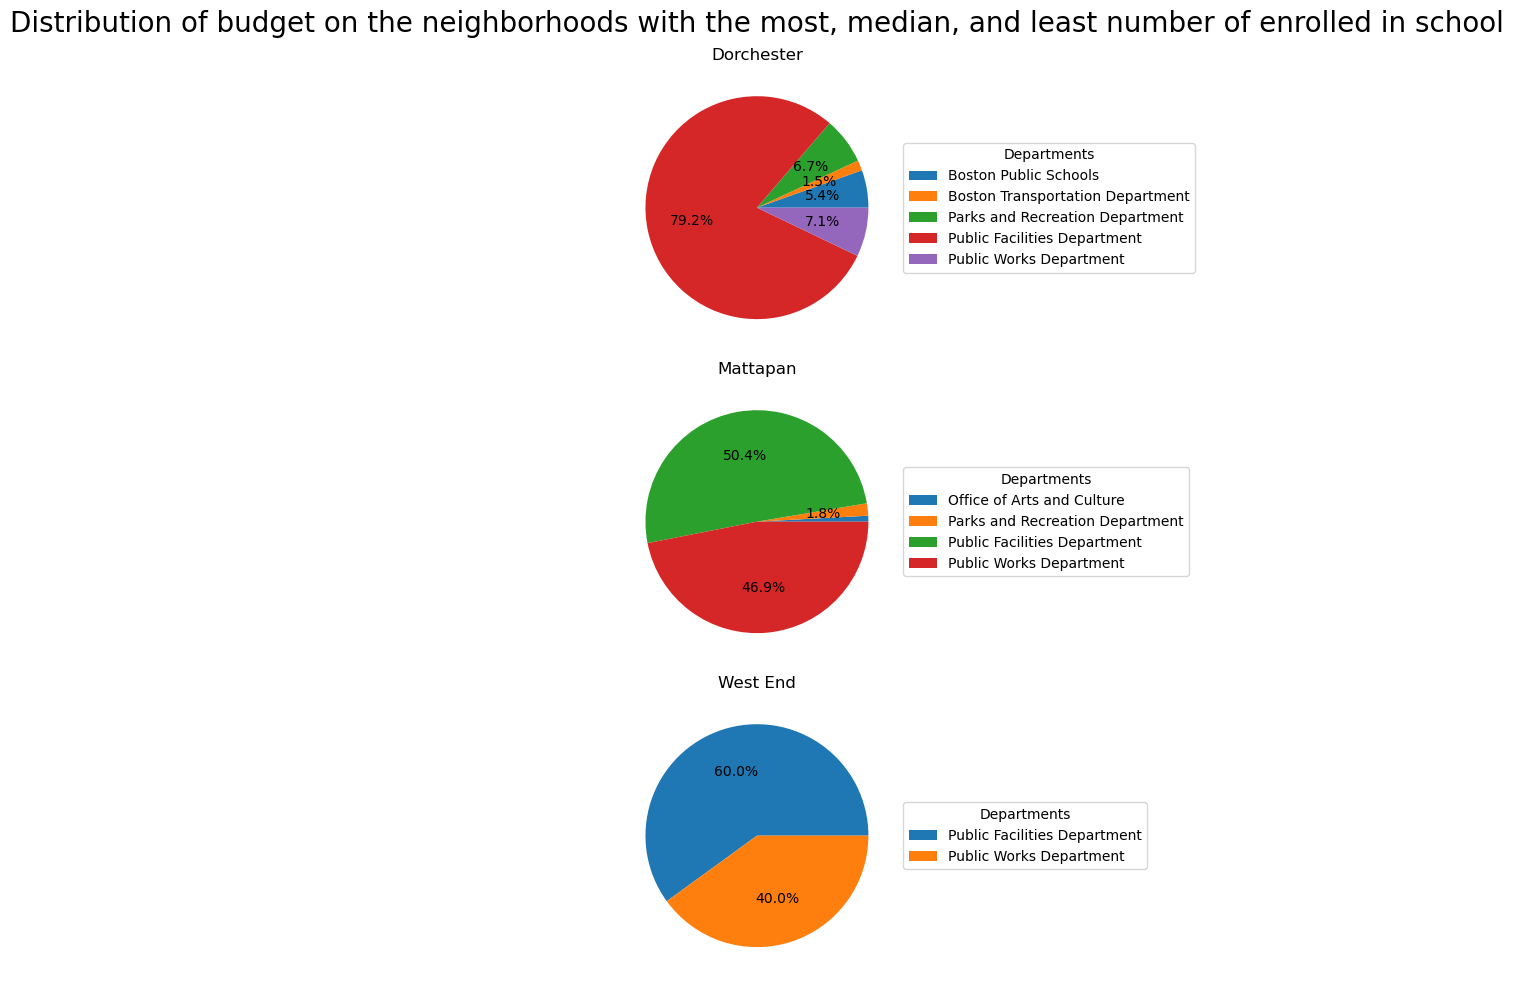

In [42]:
merged_df = pd.merge(grouped_df_dept, grouped_df_ed, on='Neighborhood')
# Get the neighborhoods with the most, median, and least number of enrolled in school
most_workers_neighborhood = merged_df.loc[merged_df['Enrolled in school:'].idxmax(), 'Neighborhood']
least_workers_neighborhood = merged_df.loc[merged_df['Enrolled in school:'].idxmin(), 'Neighborhood']
median_workers = merged_df['Enrolled in school:'].median()
median_workers_neighborhood = merged_df.loc[(merged_df['Enrolled in school:'] - median_workers).abs().idxmin(), 'Neighborhood']

selected_neighborhoods = [most_workers_neighborhood, median_workers_neighborhood, least_workers_neighborhood]

# print(selected_neighborhoods)
fig, axs = plt.subplots(3, 1, figsize=(20, 10))  # Adjust the subplot layout to 1 row and 3 columns
fig.suptitle('Distribution of budget on the neighborhoods with the most, median, and least number of enrolled in school', fontsize=20)
axs = axs.flatten()

for ax, neighborhood in zip(axs, selected_neighborhoods):
    neighborhood_data = grouped_df_dept[grouped_df_dept['Neighborhood'] == neighborhood]
    # print(neighborhood_data)
    percentage = neighborhood_data['Total_Dept_Project_Budget'] / neighborhood_data['Total_Dept_Project_Budget'].sum() * 100

    def custom_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 0.9 else None
    
    wedges, texts, autotexts = ax.pie(percentage, autopct=custom_autopct)
    ax.set_title(neighborhood)
    ax.legend(wedges, neighborhood_data['PM_Department'], title="Departments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

## Social Vulnerability Index

In [80]:
svi_df = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/Climate_Ready_Boston_Social_Vulnerability.csv")
svi_df

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383


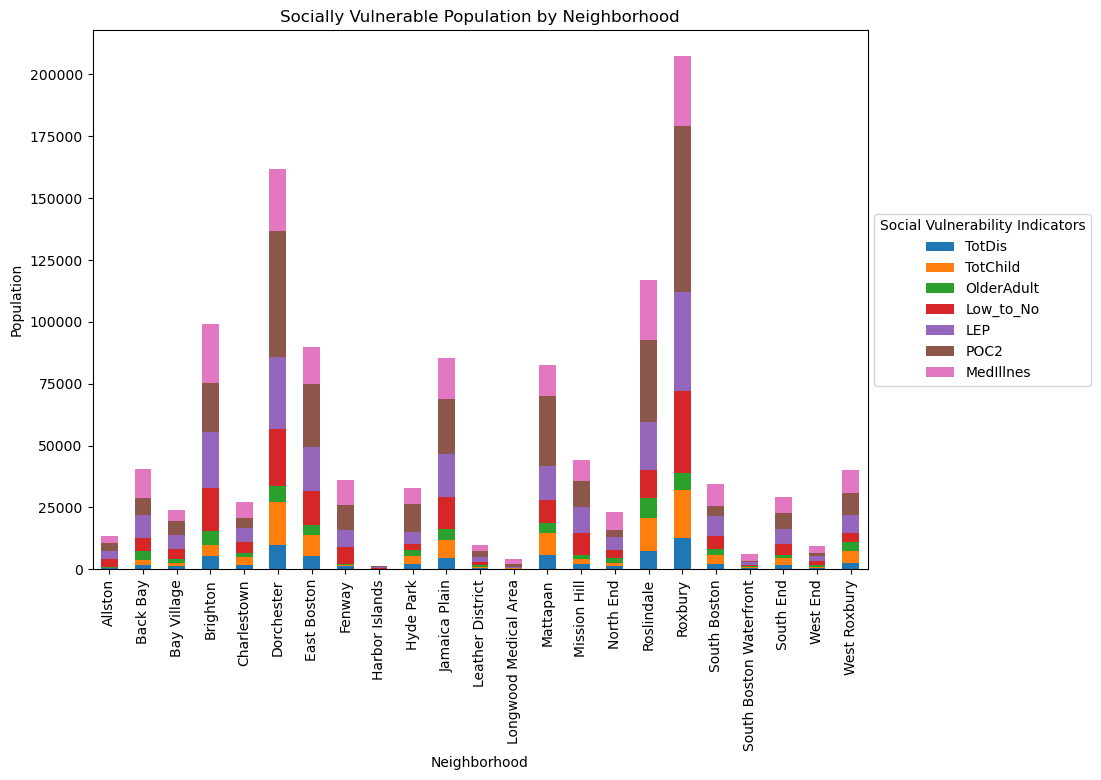

In [81]:
grouped_svi_df = svi_df.groupby('Name').sum()
grouped_svi_df.reset_index(inplace=True)

df_socio_vulnerable = grouped_svi_df.set_index('Name').loc[:, 'TotDis':'MedIllnes']
df_socio_vulnerable.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Socially Vulnerable Population by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Population')
plt.legend(title='Social Vulnerability Indicators', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [82]:
grouped_svi_df.rename(columns={'Name': 'Neighborhood'}, inplace=True)
merged_df = pd.merge(grouped_svi_df, grouped_budgets, on='Neighborhood')
merged_df['Total_SVI'] = merged_df[['TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']].sum(axis=1)
merged_df

,Neighborhood,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,...,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,Total_Project_Budget,sqMiles,Budget_per_sqm,Budget_per_pop,Total_SVI
0,Back Bay,597,275277067915,3.409361e+07,782.6818,28634,18365,1892,1686,3759,...,9075,6923,11842.96,5.803907e+06,67191.048486,65442299.0,0.62,1.055521e+08,18393.001405,40493.96
1,Bay Village,360,75075210902,9.390969e+06,215.5870,10850,5076,1122,1249,1711,...,5640,6008,4292.93,1.598363e+06,10057.148535,1525000.0,0.04,3.812500e+07,228.054434,23951.93
2,Charlestown,821,150150242402,3.768344e+07,865.0927,16439,8648,1535,3301,1811,...,5968,3981,6461.47,6.420148e+06,47678.443687,531212390.0,1.36,3.905973e+08,47319.828078,27214.47
3,Dorchester,1849,475477636009,1.312735e+08,3013.6240,69695,27507,9819,17424,6535,...,29284,50778,25010.76,2.231120e+07,115494.076201,239411239.0,7.29,3.284105e+07,17183.035886,161599.76
4,East Boston,1702,350353501405,1.494380e+08,3430.6251,40517,15857,5180,8665,4147,...,17845,25459,14824.60,2.545569e+07,106008.778492,62457890.0,4.71,1.326070e+07,3770.473287,89818.60
5,Harbor Islands,151,25025980101,3.569313e+07,819.4016,535,0,179,0,12,...,361,370,230.53,6.071246e+06,36865.797122,171778144.0,1.29,1.331614e+08,10459.608111,1501.53
6,Hyde Park,156,100100560810,5.583235e+07,1281.7344,16585,6592,2117,3256,2219,...,4902,11132,6412.46,9.473516e+06,33527.343089,6615000.0,4.57,1.447484e+06,393.305191,32721.46
7,Jamaica Plain,1108,375378370114,1.163954e+08,2672.0715,42251,18844,4570,7300,4381,...,17366,22247,16600.57,1.978967e+07,92369.490007,80782500.0,3.94,2.050317e+07,8806.551837,85449.57
8,Mattapan,320,200200805805,6.834921e+07,1569.0819,33103,13517,5605,8859,4073,...,13604,28276,12396.87,1.160770e+07,48622.467965,87935000.0,2.11,4.167536e+07,17289.618561,82344.87
9,Mission Hill,355,125125333708,2.264266e+07,519.8039,22576,6923,2215,1973,1525,...,10394,10624,8467.93,3.852255e+06,26474.016156,5242212.0,0.55,9.531295e+06,456.559136,44067.93


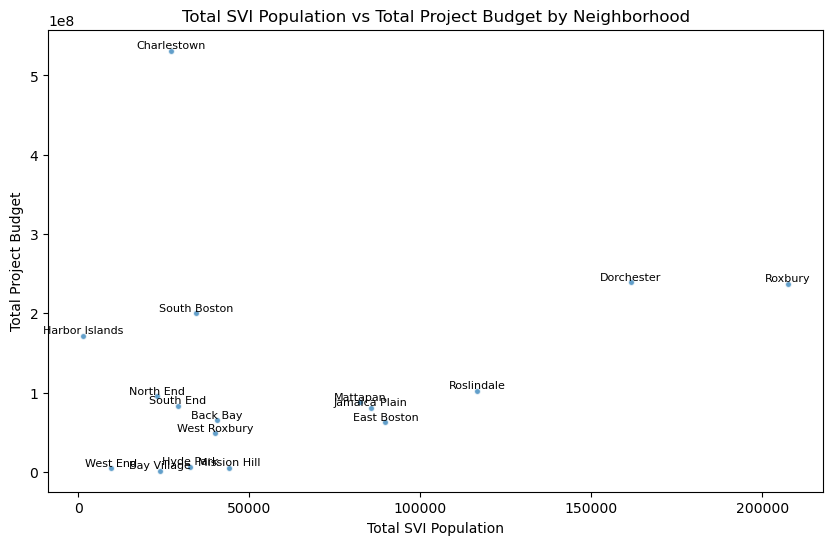

In [79]:
ax = merged_df.plot(kind='scatter', x='Total_SVI', y='Total_Project_Budget', alpha=0.7, edgecolors='w', figsize=(10, 6))
plt.title('Total SVI Population vs Total Project Budget by Neighborhood')
plt.xlabel('Total SVI Population')
plt.ylabel('Total Project Budget')

for i, row in merged_df.iterrows():
    ax.text(row['Total_SVI'], row['Total_Project_Budget'], row['Neighborhood'], ha='center', va='bottom', fontsize=8)

plt.show()

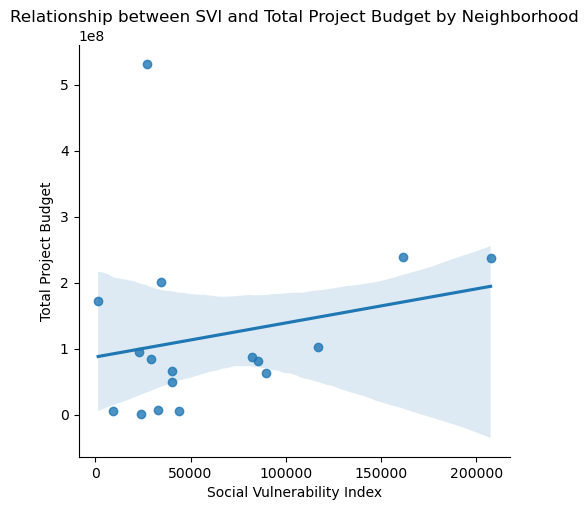

In [83]:
import seaborn as sns

sns.lmplot(x='Total_SVI', y='Total_Project_Budget', data=merged_df)

plt.title('Relationship between SVI and Total Project Budget by Neighborhood')
plt.xlabel('Social Vulnerability Index')
plt.ylabel('Total Project Budget')
for i, row in merged_df.iterrows():
    ax.text(row['Total_SVI'], row['Total_Project_Budget'], row['Neighborhood'], ha='center', va='bottom', fontsize=8)
plt.show()

Neighborhoods with higher populations of people with social vulnerability tend to have higher budgets, except for a few outliers like Charlestown--which has a very high budget and not high SVI population. 

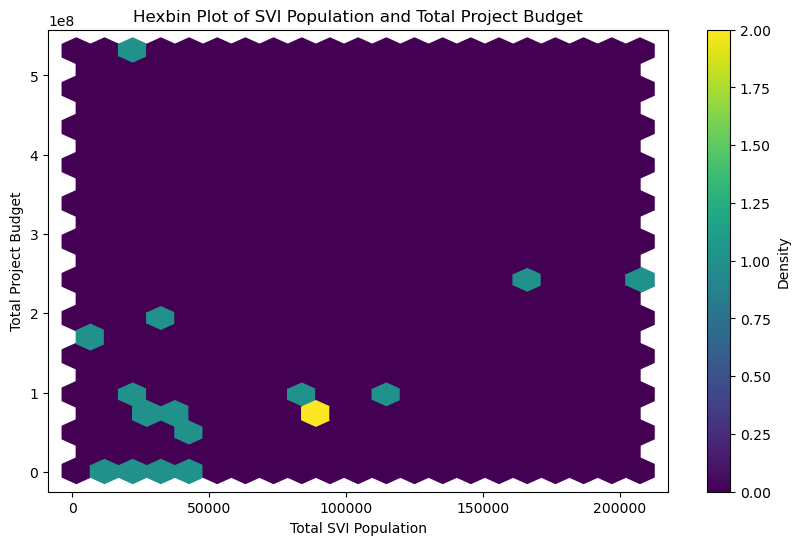

In [86]:
plt.figure(figsize=(10, 6))
plt.hexbin(x='Total_SVI', y='Total_Project_Budget', data=merged_df, gridsize=20, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of SVI Population and Total Project Budget')
plt.xlabel('Total SVI Population')
plt.ylabel('Total Project Budget')
plt.show()